## 1. データと必要なライブラリの読み込み

In [106]:
#必要なライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 形式
%matplotlib inline

# 警告消去
import warnings
warnings.filterwarnings('ignore')

test = pd.read_csv("./data/test.csv")
train = pd.read_csv("./data/train.csv")
submit = pd.read_csv("./data/gender_submission.csv")

## 2. データの確認

### 2.1 データの確認

In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [15]:
print(len(train), len(test), len(submit))

891 418 418


In [20]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### 2.2 testデータとtrainデータをまとめる（加工をするため）

In [10]:
all_df = pd.concat([train, test]).reset_index(drop=True)
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### 2.3 欠損値の確認

In [11]:
#欠損値を確認
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### 2.4 typeの確認

In [17]:
all_df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 3. 前処理

### 3.1 カテゴリ変数を数値に変更

In [26]:
# object型のカテゴリ変数
'''
"Sex", "Embarked"
'''

#ラベルエンコーディングを行う
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
labels_Sex = le.fit_transform(all_df["Sex"])
labels_Embarked = le.fit_transform(all_df["Embarked"])

all_df["Sex"] = labels_Sex
all_df["Embarked"] = labels_Embarked

all_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,2
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2
1307,1308,NaN,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,2


In [27]:
all_df["Embarked"].value_counts()

2    914
0    270
1    123
3      2
Name: Embarked, dtype: int64

In [31]:
all_df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int32
dtype: object

### 3.2 相関行列を確認

<AxesSubplot:>

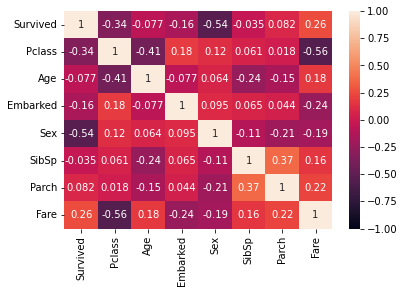

In [32]:
import seaborn as sns
cor = all_df[["Survived", "Pclass", "Age", "Embarked", "Sex", "SibSp", "Parch", "Fare"]].corr()
sns.heatmap(cor, vmin=-1, vmax=1, annot=True)

### 3.3 使えない変数の削除

In [36]:
'''
Ticket, PassengerIdは使い道が無い。
Cabinは欠損値多すぎるから一端除外で良いと思う。
名前と生存率が関係するとは思えないが、継承によって年齢を割り出すことはできる。どっちにしろAgeがあるからいらなそう。

とりあえず、PassengerId, Ticket, Cabin, Nameは削除
'''

all_df = all_df.drop(["PassengerId", "Ticket", "Cabin", "Name"], axis=1)

In [37]:
all_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,22.0,1,0,7.2500,2
1,1.0,1,0,38.0,1,0,71.2833,0
2,1.0,3,0,26.0,0,0,7.9250,2
3,1.0,1,0,35.0,1,0,53.1000,2
4,0.0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
1304,NaN,3,1,NaN,0,0,8.0500,2
1305,NaN,1,0,39.0,0,0,108.9000,0
1306,NaN,3,1,38.5,0,0,7.2500,2
1307,NaN,3,1,NaN,0,0,8.0500,2


### 3.4 欠損値の補完

In [38]:
all_df.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      0
dtype: int64

#### 3.4.1 Ageの補完

In [40]:
'''
Survivedはテストデータ分なので問題なし。
Age, Fareは直す必要がある。
何かしらの基準を基に平均を割り出すべき。
AgeはNameの敬称から割り出す。
FareはPclassから割り出す。

Nameを戻す必要あり。
'''

# Nameを戻す
all_df_origin = pd.concat([train, test]).reset_index(drop=True)
all_df = pd.concat([all_df, all_df_origin["Name"]], axis=1)
all_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name
0,0.0,3,1,22.0,1,0,7.2500,2,"Braund, Mr. Owen Harris"
1,1.0,1,0,38.0,1,0,71.2833,0,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,1.0,3,0,26.0,0,0,7.9250,2,"Heikkinen, Miss. Laina"
3,1.0,1,0,35.0,1,0,53.1000,2,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,0.0,3,1,35.0,0,0,8.0500,2,"Allen, Mr. William Henry"
...,...,...,...,...,...,...,...,...,...
1304,NaN,3,1,NaN,0,0,8.0500,2,"Spector, Mr. Woolf"
1305,NaN,1,0,39.0,0,0,108.9000,0,"Oliva y Ocana, Dona. Fermina"
1306,NaN,3,1,38.5,0,0,7.2500,2,"Saether, Mr. Simon Sivertsen"
1307,NaN,3,1,NaN,0,0,8.0500,2,"Ware, Mr. Frederick"


In [57]:
# 苗字、名前は意味ないので、敬称だけ取り出す
honorific = all_df["Name"].str.split("[,.]",2, expand=True)
honorific.columns = ["Name", "honorific", "FamName"]
honorific


,Name,honorific,FamName
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [63]:
all_df = pd.concat([all_df, honorific["honorific"]], axis=1)
all_df = all_df.drop("Name", axis=1)
all_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific
0,0.0,3,1,22.0,1,0,7.2500,2,Mr
1,1.0,1,0,38.0,1,0,71.2833,0,Mrs
2,1.0,3,0,26.0,0,0,7.9250,2,Miss
3,1.0,1,0,35.0,1,0,53.1000,2,Mrs
4,0.0,3,1,35.0,0,0,8.0500,2,Mr
...,...,...,...,...,...,...,...,...,...
1304,NaN,3,1,NaN,0,0,8.0500,2,Mr
1305,NaN,1,0,39.0,0,0,108.9000,0,Dona
1306,NaN,3,1,38.5,0,0,7.2500,2,Mr
1307,NaN,3,1,NaN,0,0,8.0500,2,Mr


In [64]:
all_df["honorific"].value_counts()

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Mlle              2
 Major             2
 Ms                2
 Lady              1
 Sir               1
 Mme               1
 Don               1
 Capt              1
 the Countess      1
 Jonkheer          1
 Dona              1
Name: honorific, dtype: int64

In [68]:
all_df.loc[all_df["Age"].isnull(), "honorific"].value_counts()

 Mr        176
 Miss       50
 Mrs        27
 Master      8
 Dr          1
 Ms          1
Name: honorific, dtype: int64

<AxesSubplot:xlabel='honorific', ylabel='Age'>

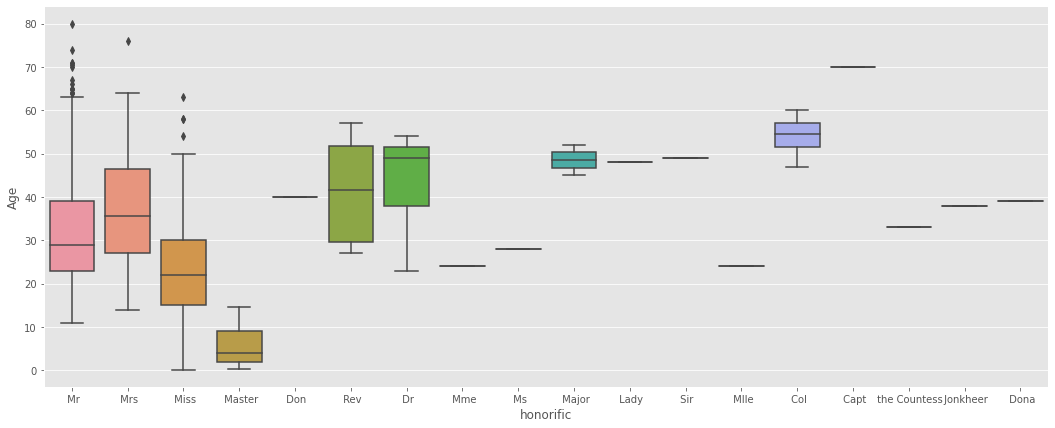

In [80]:
#箱ひげ図で年齢分布確認
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use("ggplot") #グラフのデザインを指定

# 警告消去
import warnings
warnings.filterwarnings('ignore')

#箱ひげ図
plt.figure(figsize=(18,7))
sns.boxplot(x="honorific", y="Age", data=all_df)

In [98]:
#とりあえず平均で補完
Age_mean = all_df[["honorific", "Age"]].groupby("honorific").mean().reset_index()
Age_mean.columns = ["honorific", "Age"]

all_df = pd.merge(all_df, Age_mean, on="honorific", how="left")
all_df


,Survived,Pclass,Sex,Age_x,SibSp,Parch,Fare,Embarked,honorific,Age_y
0,0.0,3,1,22.0,1,0,7.2500,2,Mr,32.252151
1,1.0,1,0,38.0,1,0,71.2833,0,Mrs,36.994118
2,1.0,3,0,26.0,0,0,7.9250,2,Miss,21.774238
3,1.0,1,0,35.0,1,0,53.1000,2,Mrs,36.994118
4,0.0,3,1,35.0,0,0,8.0500,2,Mr,32.252151
...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,1,NaN,0,0,8.0500,2,Mr,32.252151
1305,NaN,1,0,39.0,0,0,108.9000,0,Dona,39.000000
1306,NaN,3,1,38.5,0,0,7.2500,2,Mr,32.252151
1307,NaN,3,1,NaN,0,0,8.0500,2,Mr,32.252151


In [99]:
all_df.loc[all_df["Age_x"].isnull(), "Age_x"] = all_df["Age_y"]
all_df = all_df.drop(["Age_y"], axis=1)
all_df = all_df.rename({"Age_x":"Age"})
all_df

,Survived,Pclass,Sex,Age_x,SibSp,Parch,Fare,Embarked,honorific
0,0.0,3,1,22.000000,1,0,7.2500,2,Mr
1,1.0,1,0,38.000000,1,0,71.2833,0,Mrs
2,1.0,3,0,26.000000,0,0,7.9250,2,Miss
3,1.0,1,0,35.000000,1,0,53.1000,2,Mrs
4,0.0,3,1,35.000000,0,0,8.0500,2,Mr
...,...,...,...,...,...,...,...,...,...
1304,NaN,3,1,32.252151,0,0,8.0500,2,Mr
1305,NaN,1,0,39.000000,0,0,108.9000,0,Dona
1306,NaN,3,1,38.500000,0,0,7.2500,2,Mr
1307,NaN,3,1,32.252151,0,0,8.0500,2,Mr


In [100]:
all_df = all_df.rename(columns={"Age_x":"Age"})
all_df = all_df.drop(["honorific"], axis=1)
all_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,22.000000,1,0,7.2500,2
1,1.0,1,0,38.000000,1,0,71.2833,0
2,1.0,3,0,26.000000,0,0,7.9250,2
3,1.0,1,0,35.000000,1,0,53.1000,2
4,0.0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
1304,NaN,3,1,32.252151,0,0,8.0500,2
1305,NaN,1,0,39.000000,0,0,108.9000,0
1306,NaN,3,1,38.500000,0,0,7.2500,2
1307,NaN,3,1,32.252151,0,0,8.0500,2


In [101]:
all_df.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          1
Embarked      0
dtype: int64

#### 3.4.2 Fareの補完

In [102]:
#とりあえずPclassの平均で補完
Fare_mean = all_df[["Pclass", "Fare"]].groupby("Pclass").mean().reset_index()
Fare_mean.columns = ["Pclass", "Fare"]

Fare_mean

,Pclass,Fare
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [103]:
all_df = pd.merge(all_df, Fare_mean, on="Pclass", how="left")
all_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare_x,Embarked,Fare_y
0,0.0,3,1,22.000000,1,0,7.2500,2,13.302889
1,1.0,1,0,38.000000,1,0,71.2833,0,87.508992
2,1.0,3,0,26.000000,0,0,7.9250,2,13.302889
3,1.0,1,0,35.000000,1,0,53.1000,2,87.508992
4,0.0,3,1,35.000000,0,0,8.0500,2,13.302889
...,...,...,...,...,...,...,...,...,...
1304,NaN,3,1,32.252151,0,0,8.0500,2,13.302889
1305,NaN,1,0,39.000000,0,0,108.9000,0,87.508992
1306,NaN,3,1,38.500000,0,0,7.2500,2,13.302889
1307,NaN,3,1,32.252151,0,0,8.0500,2,13.302889


In [104]:
all_df.loc[all_df["Fare_x"].isnull(), "Fare_x"] = all_df["Fare_y"]
all_df = all_df.drop(["Fare_y"], axis=1)
all_df = all_df.rename(columns={"Fare_x":"Fare"})
all_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,22.000000,1,0,7.2500,2
1,1.0,1,0,38.000000,1,0,71.2833,0
2,1.0,3,0,26.000000,0,0,7.9250,2
3,1.0,1,0,35.000000,1,0,53.1000,2
4,0.0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
1304,NaN,3,1,32.252151,0,0,8.0500,2
1305,NaN,1,0,39.000000,0,0,108.9000,0
1306,NaN,3,1,38.500000,0,0,7.2500,2
1307,NaN,3,1,32.252151,0,0,8.0500,2


In [105]:
all_df.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

## 4. 学習モデル作成

### 4.1 データを訓練データとテストデータに戻す

In [108]:
train_X = all_df[~all_df["Survived"].isnull()].drop(["Survived"], axis=1).reset_index(drop=True)
train_y = train["Survived"]

test_X = all_df[all_df["Survived"].isnull()].drop(["Survived"], axis=1).reset_index(drop=True)

### 4.2 クロスバリデーション法で訓練データをさらに学習用のデータと検証用のデータに分け、lightGBMでモデル作成をする

In [113]:
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


#クロスバリデーションによる学習
folds = 3

kf = KFold(n_splits=folds)

models = []
accuracy = []

lgb_params = {
  "objective":"binary",
  "max_bin":331,
  "num_leaves":20,
  "min_data_in_leaf":57,
  "random_seed":1234
}

categories = ["Embarked", "Pclass", "Sex", "SibSp", "Parch", "Fare"]

for train_index, val_index, in kf.split(train_X):
  X_train = train_X.iloc[train_index]
  X_valid = train_X.iloc[val_index]
  y_train = train_y.iloc[train_index]
  y_valid = train_y.iloc[val_index]
  
  lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
  lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)
  
  model_lgb = lgb.train(lgb_params,
                        lgb_train,
                        valid_sets=lgb_eval,
                        num_boost_round=100,
                        early_stopping_rounds=20,
                        verbose_eval=10,
                        )
  y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
  accuracy.append(accuracy_score(y_valid, np.round(y_pred)))
  
  models.append(model_lgb)

print(accuracy)

[LightGBM] [Info] Number of positive: 236, number of negative: 358
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000672 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 131
[LightGBM] [Info] Number of data points in the train set: 594, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.397306 -> initscore=-0.416701
[LightGBM] [Info] Start training from score -0.416701
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

In [114]:
#3つのモデルで得た予測値の平均を結果とする
preds = []

for model in models:
  pred = model.predict(test_X)
  preds.append(pred)

preds_array = np.array(preds)
preds_mean = np.mean(preds_array, axis=0)
preds_int = (preds_mean > 0.5).astype(int)

In [115]:
#サンプルを書き換える
submit["Survived"] = preds_int
submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [116]:
# 提出用ファイル保存
submit.to_csv("./submit/titanic_submit02.csv", index=False)